In [0]:
!pip install pyLDAvis 

In [0]:
import re
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
stop_words.add("hotel")
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist
import spacy


import gensim
from gensim import models
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [0]:
data=pd.read_csv("/content/drive/My Drive/NLP/Project/Input/hote_rate.csv", encoding='utf8')
data

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [0]:
#basic tf-idf+ svd
def clean_text(croup):
    x=sent_tokenize(croup)
    clean_senteces=pd.Series(x).str.replace("[^a-zA-Z]"," ")
    clean_senteces=[s.lower() for s in clean_senteces]
    text_no_sp=[]
    for r in clean_senteces:
      tmp=r.split()
      sen_new=" ".join([i for i in tmp if i not in stop_words ])
      text_no_sp.append(sen_new)
    return(text_no_sp)
ct=[]
data=data.dropna(subset=["reviews.text"])
for i in data["reviews.text"]:
    tmp=clean_text(i)
    ct.append(tmp)

data["ct"]=ct

vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words="english")
tfidf = vectorizer.fit_transform(ct[1])
tfidf_feature_names = vectorizer.get_feature_names()
n_pick_topics =   1
lsa = TruncatedSVD(n_pick_topics)
X2 = lsa.fit_transform(tfidf)
n_pick_keywords = 5
topic_keywords_id = [lsa.components_[t].argsort()[:-(n_pick_keywords+1):-1] for t in range(n_pick_topics)]
for t in range(n_pick_topics):
  topic=",".join(tfidf_feature_names[topic_keywords_id[t][j]] for j in range(n_pick_keywords))
  topic.split()
print(topic)

great,money,location,value,breakfast


In [0]:
#Sklearn TF-IDF with oop
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
class sk_TF():
  def __init__(self):
    self.vectorizer = TfidfVectorizer(ngram_range=(1, 1))

  def clean_text(self,croup):
    x=sent_tokenize(croup)
    clean_senteces=pd.Series(x).str.replace("[^a-zA-Z]"," ")
    clean_senteces=pd.Series(x).str.replace("�"," ")

    clean_senteces=[s.lower() for s in clean_senteces]
    text_no_sp=[]
    for r in clean_senteces:
      tmp=r.split()
      sen_new=" ".join([i for i in tmp if i not in stop_words ])
      text_no_sp.append(sen_new)
    return(text_no_sp)
  def get_topic(self,clean_senteces):

    X = self.vectorizer.fit_transform(clean_senteces)
    terms = self.vectorizer.get_feature_names()
    n_pick_topics =   1            # 设定主题数为1
    lsa = TruncatedSVD(n_pick_topics)               
    X2 = lsa.fit_transform(X)
    n_pick_keywords = 10
    topic_keywords_id = [lsa.components_[t].argsort()[:-(n_pick_keywords+1):-1] for t in range(n_pick_topics)]
    if np.size(terms) < n_pick_keywords:
      for t in range(n_pick_topics):
        topic=" ".join(terms[topic_keywords_id[t][j]] for j in range(np.size(terms)))
    else:
      for t in range(n_pick_topics):
        topic=" ".join(terms[topic_keywords_id[t][j]] for j in range(n_pick_keywords))
    return topic.split()


In [0]:
# first 1200 sample test
np.seterr(divide='ignore', invalid='ignore')
TF_data=data[0:1200].copy()
sk=sk_TF()
tf_list=[]
for i in TF_data['reviews.text']:
  if len(i.split())>10:
    #sk=sk_TF()
    t=sk.clean_text(i)
    #print(t)
    x=sk.get_topic(t)
    #print(x)
    tf_list.append(x)
  else:
    tf_list.append(" ")
TF_data["TF"]=tf_list

In [0]:
key=[]
for i in TF_data["TF"]:
  pos_tags =nltk.pos_tag(i)
  ret=[]
  for word,pos in pos_tags:
    if (pos in tags):
      ret.append(word)
  key.append(ret)

In [0]:
TF_data["KW"]=key
TF_data

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,ct,TF,KW
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,"[pleasant min walk along sea front water bus, ...","[mosquito, take, repelant, breakfast, variety,...","[repelant, comfortable, good]"
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,"[really lovely, stayed top floor surprised jac...","[great, money, location, value, breakfast, sta...","[great, friendly]"
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,"[ett mycket bra hotell, det som drog ner betyg...","[bra, mycket, hotell, ett, var, det, 80, att, ...",[var]
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,"[stayed four nights october, staff welcoming f...","[comfortable, beds, rooms, windows, open, wide...","[comfortable, open, wide, shower]"
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,"[stayed four nights october, staff welcoming f...","[comfortable, beds, rooms, windows, open, wide...","[comfortable, open, wide, shower]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-07-09T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,4.0,Great front desk staff. Clean rooms. The do a ...,A healthy walk to the beach,NaN,A Traveler,NaN,"[great front desk staff, clean rooms, great jo...","[clean, rooms, great, pool, keeping, job, staf...","[clean, great]"
1196,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2015-09-05T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,2.0,Overpriced for the quality and location. It wa...,A healthy walk to the beach,NaN,Robert,NaN,"[overpriced quality location, labor day weeken...","[weekend, consider, staying, right, price, nor...","[right, normal, worth]"
1197,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-09-09T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,1.0,Needs some tlc. It was a good room for a great...,1 night stand,NaN,A Traveler,NaN,"[needs tlc, good room great price, one night h...","[tlc, needs, again, one, night, honest, room, ...","[great, good]"
1198,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-08-07T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,4.0,Very happy with hotel. Clean and friendly staf...,1 night stand,NaN,Rita Ann,NaN,"[happy, clean friendly staff, helpful, rooms n...","[happy, hotel, beach, blocks, price, okay, fau...","[happy, next]"


In [0]:
word_embeddings = {}
f= open("/content/drive/My Drive/NLP/Project/Input/twiglove/glove.twitter.27B.100d.txt",encoding="utf-8")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype="float32")
  word_embeddings[word]=coefs
f.close()
#GloVe词向量是单词的向量表示。这些词向量将用于生成表示句子的特征向量。我们也可以使用Bag-of-Words或TF-IDF方法来为句子生成特征，但这些方法忽略了单词的顺序，并且通常这些特征的数量非常大。


In [0]:
#text_rank
class rank_text():
  def __init__(self,word_embeddings):
    self.word_embeddings=word_embeddings

  def clean_text(self,croup):
    x=word_tokenize(croup)
    clean_senteces=pd.Series(x).str.replace("[^a-zA-Z]"," ")
    clean_senteces=[s.lower() for s in clean_senteces]
    text_no_sp=[]
    for r in clean_senteces:
      tmp=r.split()
      #print(tmp)
      sen_new=" ".join([i for i in tmp if i not in stop_words ])
      text_no_sp.append(sen_new)
    return(text_no_sp)

    
  def sent_vect(self,clean_senteces):
    sentence_vector=[]
    for i in clean_senteces:
      if len(i)!=0:
        v=sum([self.word_embeddings.get(w,np.zeros((100,)))for w in i.split()])/(len(i.split())+0.001)
      else:
        v=np.zeros((100,))
      sentence_vector.append(v)
    return sentence_vector
  def rank_text(self,org_sent,sentence_vector,n_word):
    s=word_tokenize(org_sent)
    sim_mat=np.zeros([len(s),len(s)])
    
    #print(len(s))
    for i in range (len(s)):
      for j in range(len(s)):
        if i!=j:
          sim_mat[i][j]=cosine_similarity(sentence_vector[i].reshape(1,100),sentence_vector[j].reshape(1,100))[0,0]
    nx_graph=nx.from_numpy_array(sim_mat)
    score=nx.pagerank(nx_graph)
    ranked_sentences=sorted(((score[i],s)for i,s in enumerate(s)),reverse=True)
    wl=[]
    for i in range(n_word):
      wl.append(ranked_sentences[i][1])
    return wl
    rt=rank_text(word_embeddings)
rank_list=[]
for i in TF_data['reviews.text'][0:20]:
  if len(sent_tokenize(i))>1:
    #sk=sk_TF()
    clean=rt.clean_text(i)
    #print(clean)
    s_vt=rt.sent_vect(clean)
    #print(s_vt)
    word=rt.rank_text(i,s_vt,2)
    rank_list.append(word)
  else:
    rank_list.append("NA")

#TF_data["RANK"]=rank_list

In [0]:
# a bulit in 
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
rank_list=[]
for i in TF_data['reviews.text']:
  words = word_tokenize(i) 
  t=[]
  for w in words:
    t.append(ps.stem(w))
  s=" ".join(t)
  if len(sent_tokenize(s))>1:
    x=keywords.keywords(s)
    x=x.split("\n")
    rank_list.append(x)
  else:
    rank_list.append("NA")
#print(rank_list)
TF_data["RANK"]=rank_list

In [0]:
TF_data

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,ct,TF,KW,RANK
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,"[pleasant min walk along sea front water bus, ...","[mosquito, take, repelant, breakfast, variety,...","[repelant, comfortable, good]","[min walk, pleasant]"
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,"[really lovely, stayed top floor surprised jac...","[great, money, location, value, breakfast, sta...","[great, friendly]",[love hotel]
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,"[ett mycket bra hotell, det som drog ner betyg...","[bra, mycket, hotell, ett, var, det, 80, att, ...",[var],"[det, rummet, ett, var]"
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,"[stayed four nights october, staff welcoming f...","[comfortable, beds, rooms, windows, open, wide...","[comfortable, open, wide, shower]","[hotel staff, nearbi, wide]"
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,"[stayed four nights october, staff welcoming f...","[comfortable, beds, rooms, windows, open, wide...","[comfortable, open, wide, shower]","[hotel staff, nearbi, wide]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-07-09T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,4.0,Great front desk staff. Clean rooms. The do a ...,A healthy walk to the beach,NaN,A Traveler,NaN,"[great front desk staff, clean rooms, great jo...","[clean, rooms, great, pool, keeping, job, staf...","[clean, great]",[great]
1196,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2015-09-05T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,2.0,Overpriced for the quality and location. It wa...,A healthy walk to the beach,NaN,Robert,NaN,"[overpriced quality location, labor day weeken...","[weekend, consider, staying, right, price, nor...","[right, normal, worth]","[wa, consid, weekend]"
1197,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-09-09T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,1.0,Needs some tlc. It was a good room for a great...,1 night stand,NaN,A Traveler,NaN,"[needs tlc, good room great price, one night h...","[tlc, needs, again, one, night, honest, room, ...","[great, good]",[wa]
1198,716 21st St,Hotels,Virginia Beach,US,36.847660,-75.984430,Ambassadors Inn and Suites,23451,VA,2016-08-07T00:00:00Z,2016-11-16T07:43:02Z,NaN,NaN,4.0,Very happy with hotel. Clean and friendly staf...,1 night stand,NaN,Rita Ann,NaN,"[happy, clean friendly staff, helpful, rooms n...","[happy, hotel, beach, blocks, price, okay, fau...","[happy, next]","[veri happi, help]"


In [0]:
common=[]
for i in range(len(rank_list)):
  x=set(rank_list[i])&set(tf_list[i])
  common.append(x)


In [0]:
TF_data["common"]=common
TF_data[["TF","RANK","common"]]

,TF,RANK,common
0,"[mosquito, take, repelant, breakfast, variety,...","[min walk, pleasant]",{}
1,"[great, money, location, value, breakfast, sta...",[love hotel],{}
2,"[bra, mycket, hotell, ett, var, det, 80, att, ...","[det, rummet, ett, var]","{det, ett, var}"
3,"[comfortable, beds, rooms, windows, open, wide...","[hotel staff, nearbi, wide]",{wide}
4,"[comfortable, beds, rooms, windows, open, wide...","[hotel staff, nearbi, wide]",{wide}
...,...,...,...
1195,"[clean, rooms, great, pool, keeping, job, staf...",[great],{great}
1196,"[weekend, consider, staying, right, price, nor...","[wa, consid, weekend]",{weekend}
1197,"[tlc, needs, again, one, night, honest, room, ...",[wa],{}
1198,"[happy, hotel, beach, blocks, price, okay, fau...","[veri happi, help]",{}


In [0]:
ct=[]
data=data.dropna(subset=["reviews.text"])
for i in data["reviews.text"]:
  tmp=clean_text(i)
  tmp = ' '.join(tmp)
  #tmp=str(tmp)
  ct.append(tmp)

ct


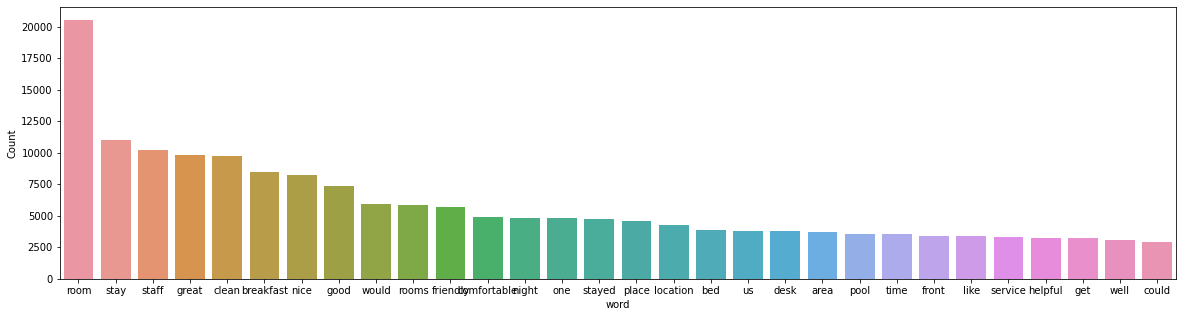

In [0]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

 # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
  
freq_words(ct) 


In [0]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
  output = []
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    output.append([token.lemma_ for token in doc if token.pos_ in tags])
  return output

In [0]:
tokenized_reviews = pd.Series(ct).apply(lambda x: x.split())
reviews_2 = lemmatization(tokenized_reviews)


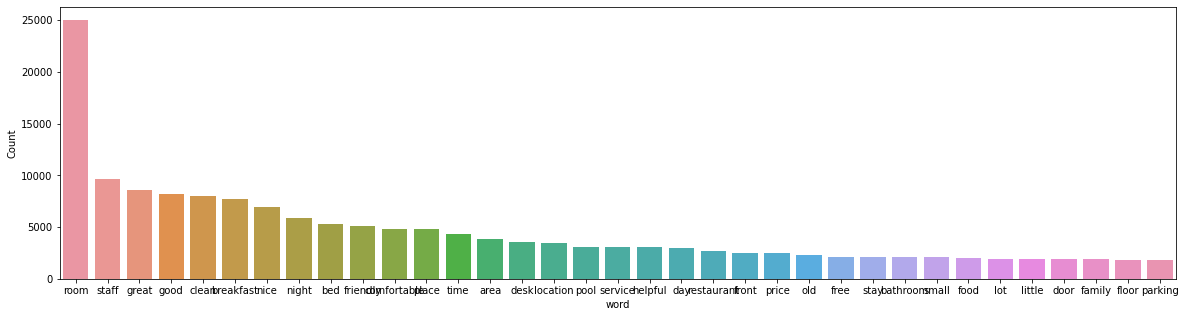

In [0]:
reviews_3 = []
for i in range(len(reviews_2)):
  reviews_3.append(' '.join(reviews_2[i]))
  
freq_words(reviews_3, 35)

In [0]:
reviews_2[:2]

[['pleasant',
  'sea',
  'front',
  'water',
  'bus',
  'restaurant',
  'comfortable',
  'breakfast',
  'good',
  'variety',
  'room',
  'aircon',
  'work',
  'repelant'],
 ['top',
  'floor',
  'staff',
  'friendly',
  'helpful',
  'breakfast',
  'great',
  'great',
  'location',
  'great',
  'value',
  'money',
  'leave']]

In [0]:
dictionary = gensim.corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,id2word=dictionary,num_topics=7, random_state=100,chunksize=1000,passes=50)

流式输出内容被截断，只能显示最后 5000 行内容。
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(gen

In [0]:
lda_model.print_topics() 
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.142947  0.073251       1        1  21.498957
3     -0.199206  0.026533       2        1  20.668665
4     -0.142534 -0.081660       3        1  19.730251
2     -0.073008 -0.167577       4        1  16.738089
0     -0.006272  0.246108       5        1  10.067025
6      0.226273 -0.233943       6        1   6.136864
5      0.337693  0.137288       7        1   5.160150, topic_info=          Term          Freq         Total Category  logprob  loglift
21       staff   9045.000000   9045.000000  Default  30.0000  30.0000
16       great   8495.000000   8495.000000  Default  29.0000  29.0000
15    friendly   4821.000000   4821.000000  Default  28.0000  28.0000
1    breakfast   7416.000000   7416.000000  Default  27.0000  27.0000
9         room  23884.000000  23884.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
350     spring    135.895248    214.645599   Topic7  -5.1740   2.5071
405     family    232.506561   1975.352905   Topic7  -4.6369   0.8246
383    perfect    154.644943    932.040039   Topic7  -5.0447   1.1680
649        kid    148.329620    836.175537   Topic7  -5.0864   1.2348
322  wonderful    148.699493   1394.951294   Topic7  -5.0839   0.7255

[405 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
84        3  0.157147           able
84        4  0.646992           able
84        5  0.195372           able
409       1  0.379814  accommodation
409       2  0.196381  accommodation
...     ...       ...            ...
1393      6  0.991326          world
264       1  0.156623           year
264       3  0.038015           year
264       4  0.700242           year
264       6  0.104922           year

[525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1, 7, 6])